# Stock Market Analysis Project

This analysis present stock data related to a 5 bigest banks in Poland, from 1 March 2020 to 30 July 2020 (During the Coronavirus crisis). Keep in mind that this project only shows how to use Python solutions in stock market analysis. Don't infer financial trading advice from the analysis I did here. 

 Names of banks: 
 - Alior Bank SA (ALR)
 - mBank SA (MBK)
 - Bank Polska Kasa Opieki SA (PEO)
 - Powszechna Kasa Oszczędności Bank Polski (PKO)
 - Santander Bank Polska (SPL)

### PART 1: Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### PART 2: Getting the Data 

In this step we use pandas to obtain historical stock data from CSV files. Each stock price history is in another CSV file. First, we merge all files to one CSV file and save it. 

In [2]:
import os
from functools import reduce
os.getcwd()

'C:\\Users\\USER\\Stock_market_Poland'

In [3]:
alr = pd.read_csv('Data/ALR_Stock_PL.csv')
mbk = pd.read_csv('Data/MBK_Stock_PL.csv')
peo = pd.read_csv('Data/PEO_Stock_PL.csv')
pko = pd.read_csv('Data/PKO_Stock_PL.csv')
spl = pd.read_csv('Data/SPL_Stock_PL.csv')

In [4]:
dfs = [alr, mbk, peo, pko, spl]
df_final = reduce(lambda left, right: pd.merge(left, right, on='Date'),dfs)

In [5]:
df_final.to_csv("Data/01_output.csv", index=False)

### Part 3:Visualizing the Data

In this step we create some plots which are absolutely necessary to analyse Stock Market data. At the baginning, we find all columns which contain open stock prices for banks.  

In [6]:
output = pd.read_csv('Data/01_output.csv')

In [7]:
open_cols = [col for col in output.columns if 'open' in col]
print(open_cols)

['ALR_open', 'MBK_open', 'PEO_open', 'PKO_open', 'SPL_open']


In [8]:
font = {'weight' : 'bold',
        'size'   : 15}
plt.rc('font', **font)

colors = ['green', 'brown', 'blue', 'red', 'orange']

#### Below, we create first subplots what present open stock prices for each analized bank. Becouse stock pirces value difference is significant, we decided to present data on five plots. That increase readable of graphs.

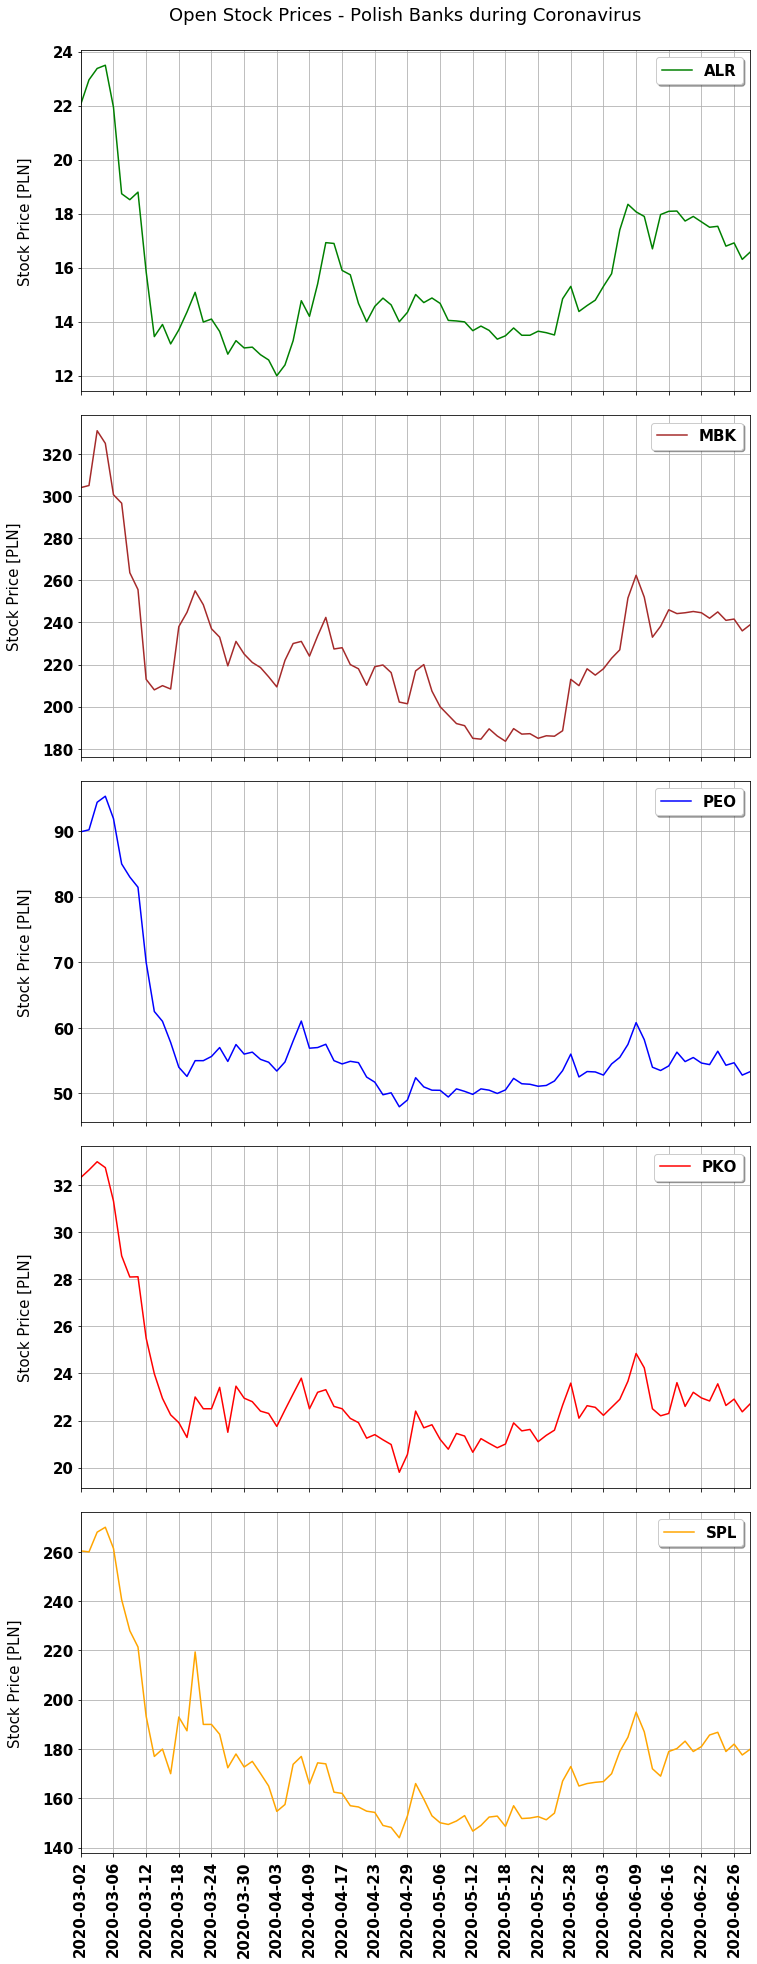

In [9]:
fig, axs = plt.subplots(5, sharex=True, gridspec_kw={'hspace': 0.07})

fig.suptitle('Open Stock Prices - Polish Banks during Coronavirus')
fig.set_figheight(30)
fig.set_figwidth(12)
fig.subplots_adjust(top=0.96)

num = 0

for ax in axs:
    ax.plot(output.Date, output[open_cols[num]], color = colors[num], label = open_cols[num][:3])
    ax.label_outer()
    ax.grid(True)
    ax.tick_params('x', labelrotation=90)
    ax.set_ylabel("Stock Price [PLN]", labelpad=20)
    ax.set_xticks(output.Date[::4])
    ax.set_xlim(output.Date[0], output['Date'].iloc[-1])
    ax.legend(fancybox=True, shadow=True)
    num +=1

fig.savefig('images/open_prices.jpg', dpi=300)

In [10]:
volume_cols = [col for col in output.columns if 'volume' in col]
print(volume_cols)

['ALR_volume', 'MBK_volume', 'PEO_volume', 'PKO_volume', 'SPL_volume']


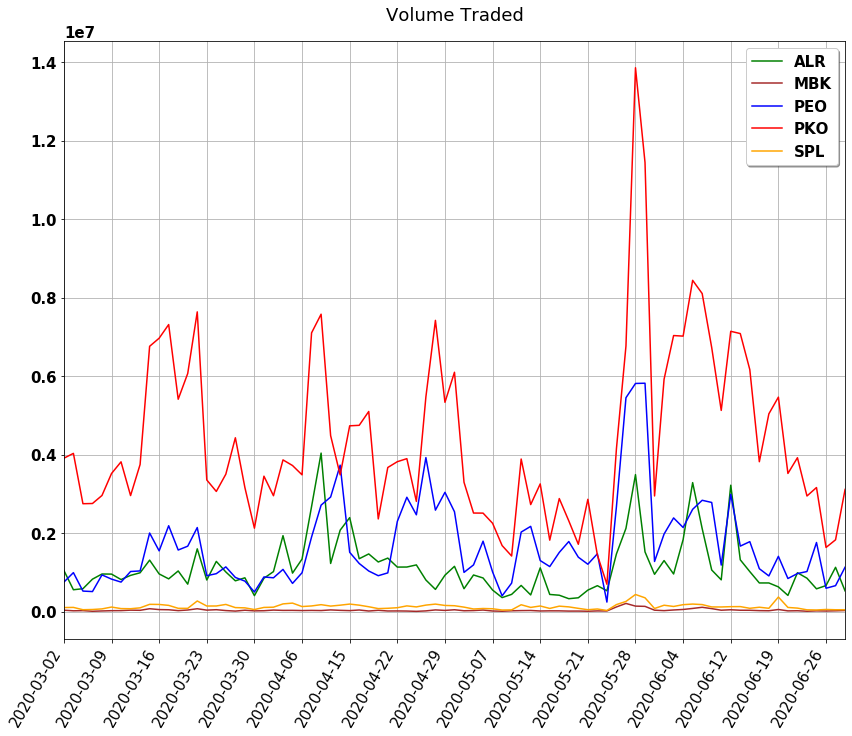

In [11]:
vol_p = plt.figure(figsize= (14,11))

for line in range(len(volume_cols)):
    plt.plot(output.Date, output[volume_cols[line]], color = colors[line], label = volume_cols[line][:3])

plt.legend(fancybox=True, shadow=True)
plt.xticks(output.Date[::5], rotation=60, ha="right", fontweight="light")
plt.xlim(output.Date[0], output['Date'].iloc[-1])
plt.title('Volume Traded', pad=20)
plt.grid(True)

plt.savefig('images/volume_traded.jpg', dpi=200)
plt.show()

In [12]:
#create a list of stock ticker for each Bank. 
ticker = []

for item in range(len(volume_cols)):
    ticker.append(volume_cols[item][:3])
    
print(ticker)

['ALR', 'MBK', 'PEO', 'PKO', 'SPL']


In [13]:
#calculate total traded value, that to multiple open stock price by volume and create new columns. 
for col in range(len(ticker)):
    output['{}_traded'.format(ticker[col])] = output['{}_open'.format(ticker[col])] * output['{}_volume'.format(ticker[col])]
output.to_csv('Data/02_output_traded.csv')
traded = pd.read_csv('Data/02_output_traded.csv')

In [14]:
traded_cols = [col for col in traded.columns if 'traded' in col]
print(traded_cols)

['ALR_traded', 'MBK_traded', 'PEO_traded', 'PKO_traded', 'SPL_traded']


#### This graf visualise total traded value, what is a open stock price multipy by traded volume in current day. 

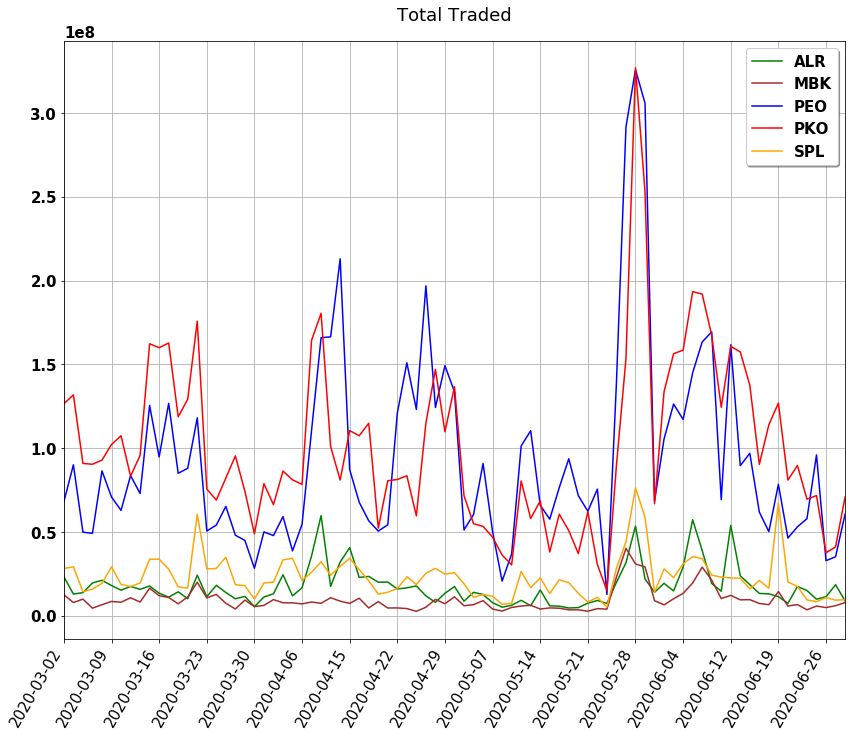

In [15]:
traded_p = plt.figure(figsize= (14,11))

for line in range(len(traded_cols)):
    plt.plot(traded.Date, traded[traded_cols[line]], color = colors[line], label = traded_cols[line][:3])

plt.legend(fancybox=True, shadow=True)
plt.xticks(traded.Date[::5], rotation=60, ha="right", fontweight="light")
plt.xlim(traded.Date[0], traded['Date'].iloc[-1])
plt.title('Total Traded', pad=20)
plt.grid(True)

plt.savefig('images/total_traded.jpg', dpi=200)
plt.show()

In [16]:
#Select open price columns and save to the separated table.
open_tab = pd.concat([traded.ALR_open, traded.MBK_open, traded.PEO_open, traded.PKO_open, traded.SPL_open], axis=1)
open_tab.columns = ['ALR Open', 'MBK Open', 'PEO Open', 'PKO Open', 'SPL Open']
open_tab.to_csv('Data/03_output_open.csv')

open_tab.head()

,ALR Open,MBK Open,PEO Open,PKO Open,SPL Open
0,22.06,304.0,89.90,32.33,260.4
1,22.96,305.0,90.20,32.65,260.0
2,23.38,331.0,94.40,33.00,268.0
3,23.50,325.0,95.32,32.75,270.0
4,21.94,300.6,91.90,31.33,261.4




#### This subplots present correlation matrix between stock prices. In most cases we see, that is positive correlation, but we can notice that the strongest relationship is between PEO and PKO. We can also observe that the worst price correlation is between Alior Bank and others banks. 



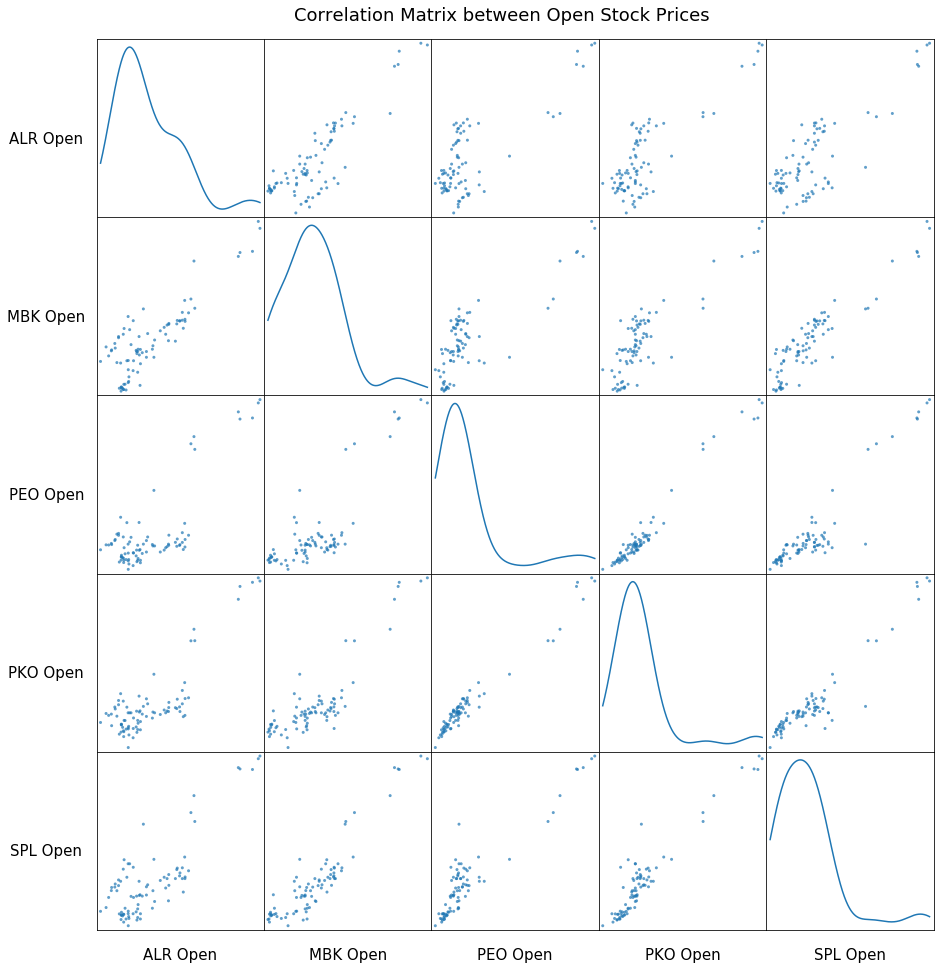

In [17]:
from pandas.plotting import scatter_matrix

axes = scatter_matrix(open_tab, figsize=(15,15), alpha=0.7, diagonal='kde')

for ax in axes.reshape(-1):
    ax.yaxis.label.set_rotation(0)
    ax.get_yaxis().set_label_coords(-0.3,0.4)
    ax.get_xaxis().set_label_coords(0.5,-0.1)
    ax.set_xticks(()) 
    ax.set_yticks(())
    
plt.suptitle('Correlation Matrix between Open Stock Prices')
plt.subplots_adjust(top=0.95)
plt.savefig('images/matrix_open.jpg', dpi=300)
plt.show()